fuzzy logic

In [1]:
from fuzzylogic.classes import Domain, Set, Rule
from fuzzylogic.functions import trapezoid, triangular
import matplotlib.pyplot as plt
import numpy as np

Exemple 1

E/S controller definition

In [2]:

H = Domain('H', 75, 85)


DH = Domain('DH', -9, 9)


U = Domain('U', -10, 10)

Fuzzification

In [3]:
def custom_membership(x):
    if x <= 80:
        return 0
    elif 80 < x <= 83:
        return (x - 80) / (83 - 80)  # Rising slope
    elif 83 < x <= 85:
        return 1  # Flat top
    elif 85 < x:
        return 0 

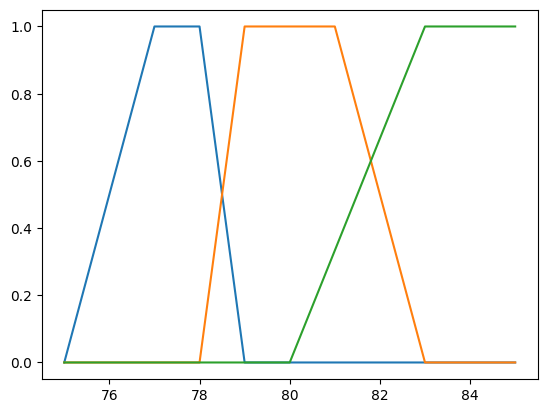

In [4]:
# Initialisation 
H.P = trapezoid(75,77,78,79)
H.M = trapezoid(78,79,81,83)
H.H = custom_membership
H.P.plot()
H.M.plot()
H.H.plot()

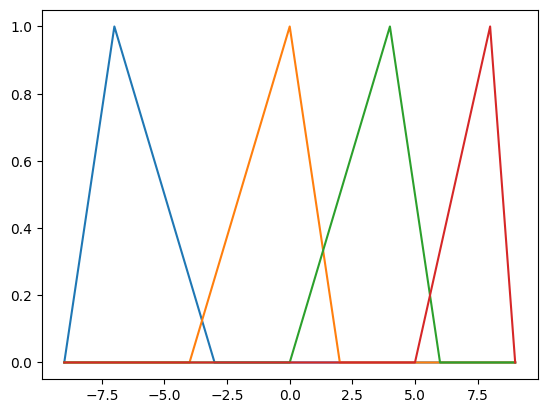

In [5]:
DH.TN = trapezoid(-9,-7,-7,-3)
DH.N = trapezoid(-4,0,0,2)
DH.P = trapezoid(0,4,4,6)
DH.TP = trapezoid(5,8,8,9)
DH.TN.plot()
DH.N.plot()
DH.P.plot()
DH.TP.plot()

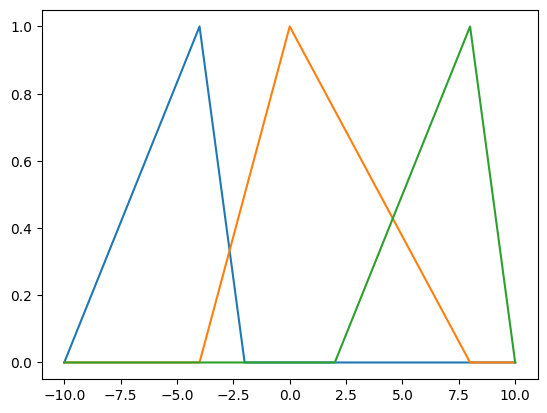

In [6]:
U.B = trapezoid(-10,-4,-4,-2)
U.M = trapezoid(-4,0,0,8)
U.H = trapezoid(2,8,8,10)
U.B.plot()
U.M.plot()
U.H.plot()

In [7]:
rules = Rule({
    (H.P,  DH.TN): U.H,
    (H.P,  DH.P): U.H,
    (H.M,  DH.TN): U.H,
    (H.M,  DH.P): U.B,
    (H.H,  DH.TN): U.B,
    (H.H,  DH.P): U.B,
    (H.P,  DH.N): U.H,
    (H.P,  DH.TP): U.M,
    (H.M,  DH.N): U.H,
    (H.M,  DH.TP): U.B,
    (H.H,  DH.N): U.B,
    (H.H,  DH.TP): U.B,
})

Inference (Mandani)

In [9]:
h_output = list(H(81.5).values())
h_output = [float(x) for x in h_output]

dh_output = list(DH(1).values())
dh_output = [float(x) for x in dh_output]

'''
h_output[0] : P
h_output[1] : M
h_output[2] : H

----

dh_output[0] : TN
dh_output[1] : N
dh_output[2] : P
dh_output[3] : TP

'''
u_b = max(      min(h_output[1], dh_output[2]), 
                min(h_output[2], dh_output[0]), 
                min(h_output[2], dh_output[2]), 
                min(h_output[1], dh_output[3]),
                min(h_output[2], dh_output[1]), 
                min(h_output[2], dh_output[3])
                )

u_m = min(h_output[0], dh_output[3])
             

u_h = max(      min(h_output[0], dh_output[0]), 
                min(h_output[0], dh_output[2]), 
                min(h_output[1], dh_output[0]), 
                min(h_output[0], dh_output[1]),
                min(h_output[1], dh_output[1]), 
               
                )

all_values = [u_b, u_m, u_h]

print(f"Debit bas {u_b}\nDebit moyen {u_m}\nDebit haut {u_h}")

Debit bas 0.5
Debit moyen 0.0
Debit haut 0.5


Defuzzification

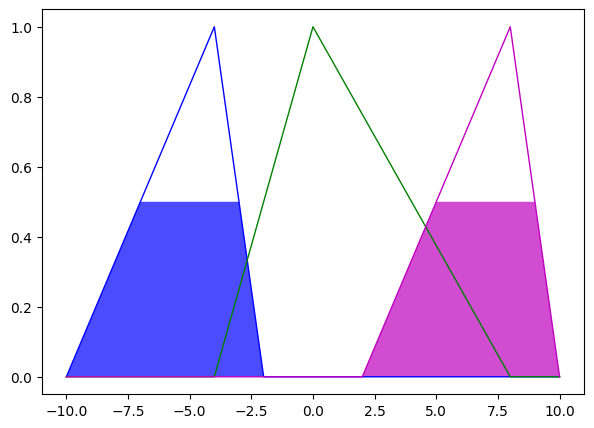

In [ ]:
fig, axis = plt.subplots(figsize=(7, 5))

x_U = U.range

U_0 = np.zeros_like(x_U)
parametres_U = [U.B, U.M, U.H]
j=0
colors = ['b', 'g', 'm']
for each in parametres_U:
    axis.plot(x_U, each.array(), colors[j], linewidth=1)
    axis.fill_between(x_U, U_0, [min(all_values[j], x) for x in each.array()], 
                      facecolor=colors[j], alpha=0.7)
    j+=1

In [12]:
values = {H: 81.5, DH: 1}
gravity_center = rules(values)
print(f"gravity center for values h= 81.5 and dh = 1 : {gravity_center}")

gravity center for values h= 81.5 and dh = 1 : -1.7460317460317487


Exemple 2

In [ ]:
'''
Input Variable 1: Performance of the Car Motor (H)
This represents how powerful and efficient the car motor is, with linguistic terms:

H: High performance
VH: Very High performance
EH: Extra High performance

Input Variable 2: Driver Reflexes (R)
This represents the reaction time and reflexes of the driver, with linguistic terms:

G: Good reflexes
E: Excellent reflexes

Output Variable: Obstacles Skipped (O)
This represents how many obstacles the driver can avoid successfully during a race.
Ranges for Membership Functions:

Low (L): (0, 2, 4)
Few obstacles skipped, indicating low motor performance or poor reflexes.
Moderate (M): (3, 6, 8)
A reasonable number of obstacles skipped with average performance and reflexes.
High (H): (7, 9, 12)
Most obstacles skipped, reflecting top-tier motor performance and driver reflexes.


'''


In [ ]:
H = Domain('H', 200, 350)
R = Domain('R', 100, 250)
O = Domain('O', 0, 12)

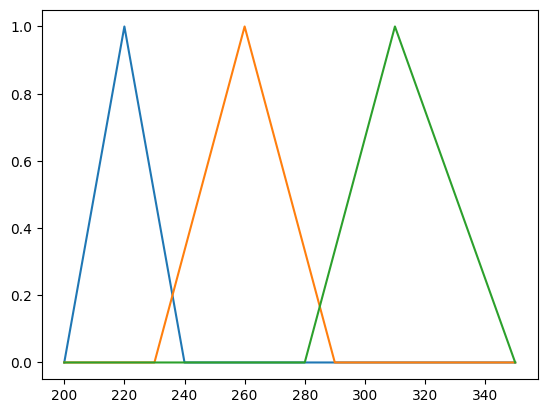

In [14]:
H.H  = trapezoid (200, 220, 220, 240)
H.VH = trapezoid(230, 260, 260, 290)
H.EH = trapezoid(280, 310, 310, 350)
H.H.plot()
H.VH.plot()
H.EH.plot()

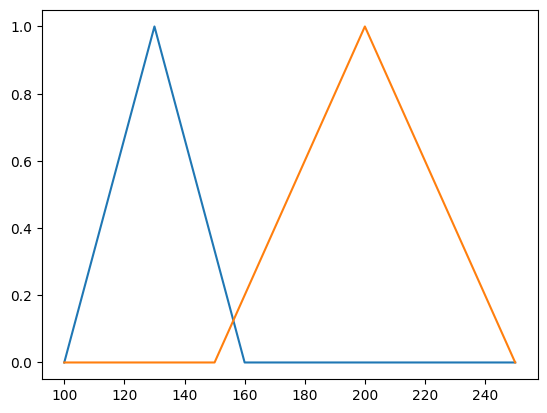

In [15]:
R.G  = trapezoid (100, 130, 130, 160)
R.E = trapezoid(150, 200, 200, 250)

R.G.plot()
R.E.plot()


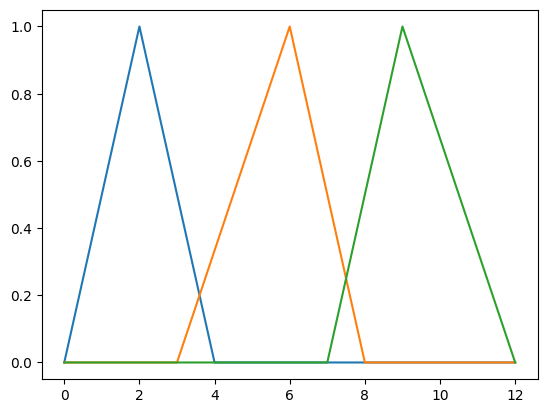

In [21]:
O.L = trapezoid(0, 2, 2, 4)
O.M = trapezoid(3, 6, 6, 8)
O.H = trapezoid(7, 9, 9, 12)
O.L.plot()
O.M.plot()
O.H.plot()

In [ ]:
rules = Rule({
    (H.H,  R.G): O.H, 
    (H.H,  R.E): O.H,
    (H.VH,  R.G): O.L,
    (H.VH,  R.E): O.M,
    (H.EH,  R.G): O.L, 
    (H.EH,  R.E): O.M,
})

In [25]:
h_output = list(H(224).values())
h_output = [float(x) for x in h_output]

r_output = list(R(150).values())
r_output = [float(x) for x in r_output]

'''
h_output[0] : H
h_output[1] : VH
h_output[2] : EH

----

r_output[0] : G
r_output[1] : E


'''
o_l = max(      min(h_output[1], r_output[0]), 
                min(h_output[2], r_output[0]), 
                )

o_m = max(      min(h_output[1], r_output[1]), 
                min(h_output[2], r_output[1]), 
               
                )          

o_h = max(      min(h_output[0], r_output[0]), 
                min(h_output[0], r_output[1]), 
               
                )

all_values = [o_l, o_m, o_h]

print(f"Low skepped obstacles {u_b}\nModerate skipped obstacles {u_m}\nHeight skipped obstacles {u_h}")

Low skepped obstacles 0.5
Moderate skipped obstacles 0.0
Height skipped obstacles 0.5


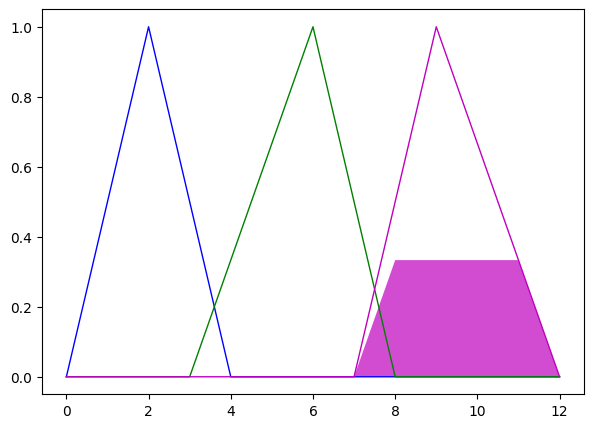

In [26]:
fig, axis = plt.subplots(figsize=(7, 5))

x_O = O.range

O_0 = np.zeros_like(x_O)
parametres_O = [O.L, O.M, O.H]
j=0
colors = ['b', 'g', 'm']
for each in parametres_O:
    axis.plot(x_O, each.array(), colors[j], linewidth=1)
    axis.fill_between(x_O, O_0, [min(all_values[j], x) for x in each.array()], facecolor=colors[j], alpha=0.7)
    j+=1

In [23]:
values = {H: 224, R: 150}
gravity_center = rules(values)
print(f"gravity center for values h= 224 and dh = 150 : {gravity_center}")

gravity center for values h= 224 and dh = 150 : 8.615384615384615
